# **Employee Salary Prediction**
###(Using ML Libraries)





---





In [375]:
# Import necessary Py libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [376]:
data=pd.read_csv(r"/content/Salary_List.csv")

In [377]:
data.shape

(32561, 15)

In [378]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [379]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [381]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [382]:
# Checking the null values in the data set
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [383]:
print(data.workclass.value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [384]:
data.workclass.replace({' ?':' Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Others               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [385]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [386]:
data.occupation.replace({' ?':' Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Others               1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [387]:
data=data[data['workclass']!=' Without-pay']
data=data[data['workclass']!=' Never-worked']
print(data['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Others               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: count, dtype: int64


In [388]:
print(data.relationship.value_counts())

relationship
Husband           13189
Not-in-family      8304
Own-child          5058
Unmarried          3444
Wife               1564
Other-relative      981
Name: count, dtype: int64


In [389]:
print(data.sex.value_counts())

sex
Male      21776
Female    10764
Name: count, dtype: int64


In [390]:
data.shape

(32540, 15)

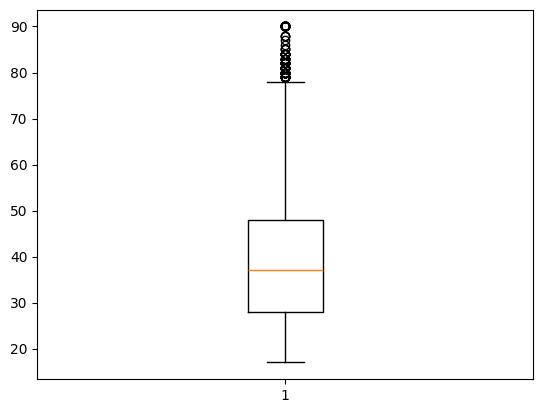

In [392]:
#outlier detection
plt.boxplot(data['age'])
plt.show()

In [393]:
data=data[(data['age']<=75)&(data['age']>=17)]

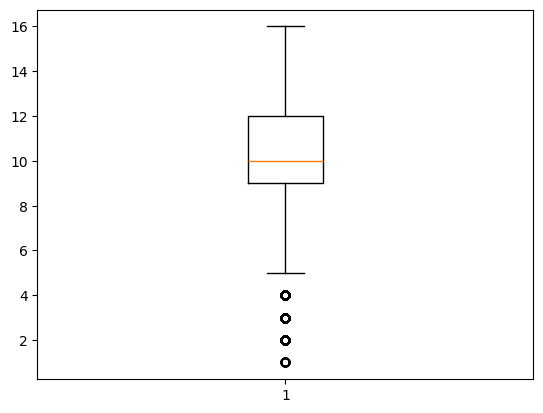

In [395]:
plt.boxplot(data['education-num'])
plt.show()

In [396]:
data=data[(data['education-num']<=16)&(data['education-num']>=5)]

In [397]:
#redundant features removal
data=data.drop(columns=['education'])

In [398]:
data.shape

(31144, 14)

In [399]:
data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K




---



# **Data Visualization**

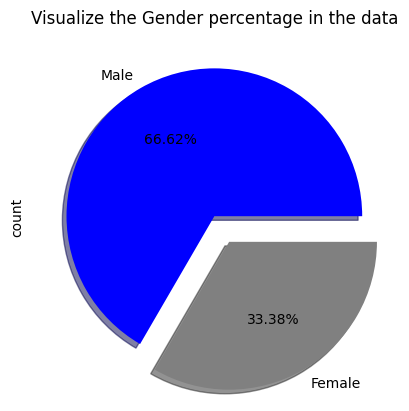

In [400]:
data['sex'].value_counts().plot(kind='pie',
    explode=[0,0.2],
    labels=['Male','Female'],
    colors=['blue','gray'],
    autopct='%1.2f%%',
    shadow=True,
        )
plt.title("Visualize the Gender percentage in the data")
plt.show()

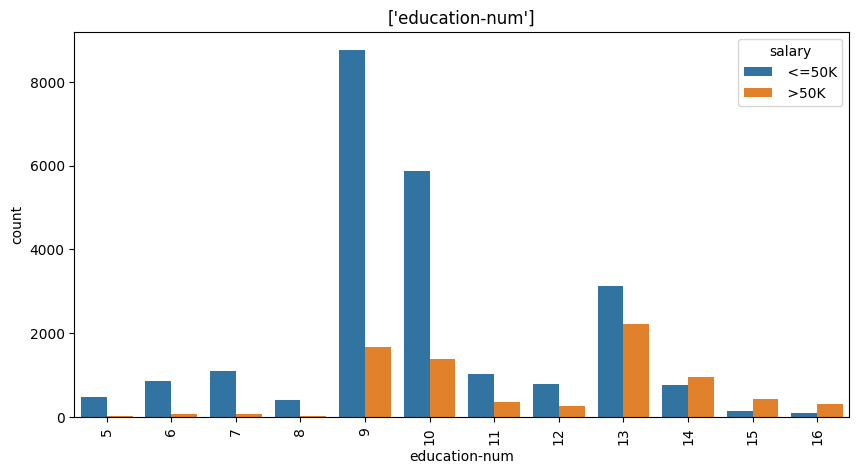

In [401]:
numerical=['education-num']
for i in numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data,x=i,hue='salary')
    plt.title([i])
    plt.xticks(rotation=90)
    plt.show()

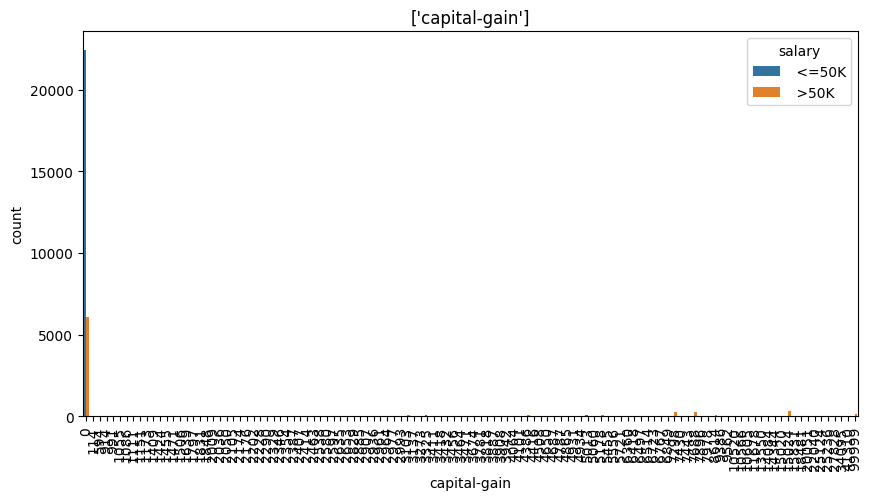

In [405]:
numerical=['capital-gain']
for i in numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data,x=i,hue='salary')
    plt.title([i])
    plt.xticks(rotation=90)
    plt.show()

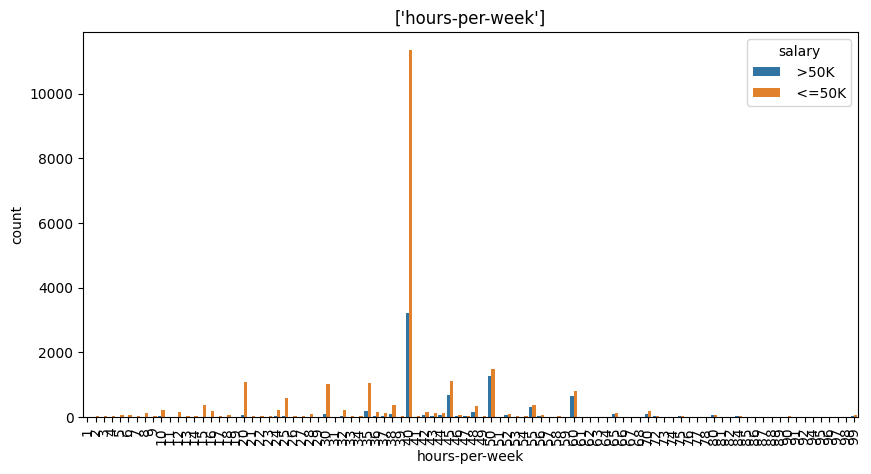

In [406]:
numerical=['hours-per-week']
for i in numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data,x=i,hue='salary')
    plt.title([i])
    plt.xticks(rotation=90)
    plt.show()

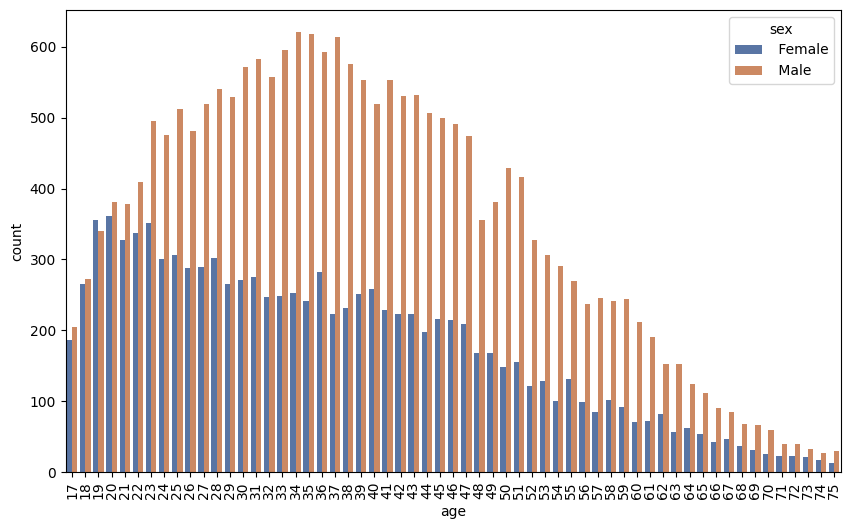

In [407]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='age',hue='sex',palette='deep')
plt.xticks(rotation=90)
plt.show()

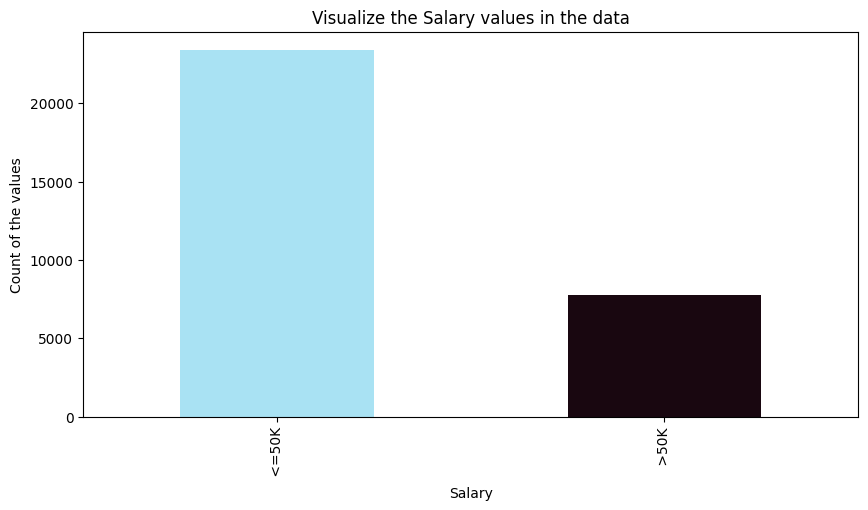

In [408]:
plt.figure(figsize=(10,5))
data['salary'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                                               color=['#A9E2F3','#190710'])
plt.title("Visualize the Salary values in the data")
plt.xlabel("Salary")
plt.ylabel("Count of the values")
plt.show()



---



# **Label Encoding**

In [411]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['sex']=encoder.fit_transform(data['sex'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [412]:
data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,77516,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,5,83311,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,3,215646,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,3,234721,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,3,338409,13,2,10,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,12,2,13,5,4,0,0,0,38,38,<=50K
32557,40,3,154374,9,2,6,0,4,1,0,0,40,38,>50K
32558,58,3,151910,9,6,0,4,4,0,0,0,40,38,<=50K
32559,22,3,201490,9,4,0,3,4,1,0,0,20,38,<=50K


In [413]:
# Split the data into independent and dependent variable
x=data.drop(columns=['salary'])
y=data['salary']
x

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,13,2,10,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,12,2,13,5,4,0,0,0,38,38
32557,40,3,154374,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,9,4,0,3,4,1,0,0,20,38




---



# **Machine Learning Modeling**

In [414]:
# Install the all Required libraries for the machine Learning Modeling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8184
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4650
        >50K       0.71      0.47      0.57      1579

    accuracy                           0.82      6229
   macro avg       0.78      0.70      0.73      6229
weighted avg       0.81      0.82      0.80      6229

RandomForest Accuracy: 0.8526
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4650
        >50K       0.75      0.63      0.68      1579

    accuracy                           0.85      6229
   macro avg       0.82      0.78      0.79      6229
weighted avg       0.85      0.85      0.85      6229

KNN Accuracy: 0.8215
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      4650
        >50K       0.67      0.58      0.62      1579

    accuracy                           0.82      6229
   macro avg       0.77      0.74      0.

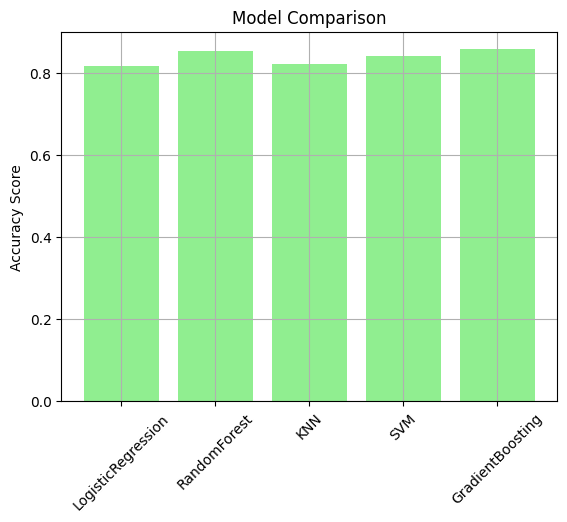

In [415]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='lightgreen')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [416]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")

LogisticRegression: 0.8030
RandomForest: 0.8525
KNN: 0.7746
SVM: 0.7858
GradientBoosting: 0.8576

✅ Best model: GradientBoosting with accuracy 0.8576
✅ Saved best model as best_model.pkl




---



# **implementing using Streamlit**

In [417]:
pip install joblib

In [418]:
!pip install streamlit pyngrok

In [420]:
%%writefile app.py
import pandas as pd
import numpy as np
import streamlit as st
import pickle
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Updated title and subtitle
st.title("💼Employee Salary Prediction [Using ML Libraries]")
st.subheader("\nPlease enter the below information to predict the salary:")

# Load the best saved model
import joblib
model = joblib.load('best_model.pkl')

def main():
    # Age slider
    age = st.slider('Age', min_value=17, max_value=90, value=25)

    workclass = st.selectbox('Select Work Class', [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
                                                    ' Local-gov', 'Others', ' Self-emp-inc', ' Without-pay', ' Never-worked'])
    workclass_dict = {' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov': 3,
                      ' Local-gov': 4, 'Others': 5, ' Self-emp-inc': 6, ' Without-pay': 7, ' Never-worked': 8}
    workclass_1 = workclass_dict.get(workclass, 5)

    fnlwgt = st.number_input('Final Weight', min_value=12285, max_value=1484705, value=12285)
    education_num = st.number_input('Education Number', min_value=1, max_value=16, value=1)

    marital_status = st.selectbox('Marital Status', [' Never-married', ' Married-civ-spouse', ' Divorced',
                                                     ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
                                                     ' Widowed'])
    marital_dict = {' Never-married': 0, ' Married-civ-spouse': 1, ' Divorced': 2,
                    ' Married-spouse-absent': 3, ' Separated': 4, ' Married-AF-spouse': 5, ' Widowed': 6}
    marital_status_1 = marital_dict.get(marital_status, 0)

    occupation = st.selectbox('Occupation', [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
                                             ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
                                             ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
                                             ' Tech-support', ' Others', ' Protective-serv', ' Armed-Forces',
                                             ' Priv-house-serv'])
    occupation_dict = {' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2, ' Prof-specialty': 3,
                       ' Other-service': 4, ' Sales': 5, ' Craft-repair': 6, ' Transport-moving': 7,
                       ' Farming-fishing': 8, ' Machine-op-inspct': 9, ' Tech-support': 10, ' Others': 11,
                       ' Protective-serv': 12, ' Armed-Forces': 13, ' Priv-house-serv': 14}
    occupation_1 = occupation_dict.get(occupation, 11)

    relationship = st.selectbox('Relationship', [' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative'])
    relationship_dict = {' Not-in-family': 0, ' Husband': 1, ' Wife': 2, ' Own-child': 3, ' Unmarried': 4, ' Other-relative': 5}
    relationship_1 = relationship_dict.get(relationship, 0)

    race = st.selectbox('Race', [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'])
    race_dict = {' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4}
    race_1 = race_dict.get(race, 0)

    sex = st.selectbox('Sex', [' Male', ' Female'])
    sex_1 = 0 if sex == ' Male' else 1

    capital_gain = st.number_input('Capital Gain', min_value=0, max_value=99999, value=0)
    capital_loss = st.number_input('Capital Loss', min_value=0, max_value=4356, value=0)
    hours_per_week = st.number_input('Hours Per Week', min_value=1, max_value=99, value=1)

    native_country = st.selectbox('Native Country', [' United-States', ' Cuba', ' Jamaica', ' India', ' Others', ' Mexico',
                                                     ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
                                                     ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
                                                     ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
                                                     ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
                                                     ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
                                                     ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
                                                     ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
                                                     ' Ireland', ' Hungary', ' Holand-Netherlands'])
    country_dict = {val: idx for idx, val in enumerate([' United-States', ' Cuba', ' Jamaica', ' India', ' Others', ' Mexico',
                                                        ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
                                                        ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
                                                        ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
                                                        ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
                                                        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
                                                        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
                                                        ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
                                                        ' Ireland', ' Hungary', ' Holand-Netherlands'])}
    native_country_1 = country_dict.get(native_country, 4)

    if st.button("Predict Salary Range"):
        data = [age, workclass_1, fnlwgt, education_num, marital_status_1,
                occupation_1, relationship_1, race_1, sex_1, capital_gain, capital_loss,
                hours_per_week, native_country_1]

        # Apply scaling
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform([data])

        result = model.predict(scaled_data)
        if result == 0:
            st.success("The salary is likely **less than 50K**.")
        else:
            st.success("The salary is likely **more than 50K**.")

        # Divider line after prediction
        st.markdown("<hr>", unsafe_allow_html=True)

if __name__ == "__main__":
    main()


Overwriting app.py


In [421]:
!ngrok authtoken 30Be239F5se1aXEJa9rMfQ0z8Ic_54oVZv9bj3eqB96eaQK4Y

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [422]:
import os
import threading

def run_streamlit():
  os.system('streamlit run app.py --server.port 8502')

thread= threading.Thread(target=run_streamlit)
thread.start()

In [423]:
from pyngrok import ngrok
import time

# Kill existing ngrok tunnels
ngrok.kill()

time.sleep(5)

public_url= ngrok.connect(8502)
print("Streamlit app is live here: ", public_url)

Streamlit app is live here:  NgrokTunnel: "https://4d1f649c02db.ngrok-free.app" -> "http://localhost:8502"




---



---

